In [65]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
#from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
#reading dataset
df = pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
#checking the rows & columns in the dataset
df.shape

(2240, 27)

In [4]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#checking the percentage of missing values
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [7]:
#filling the missing values with zero in the numerical category column
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [8]:
#checking dataset if it fills missing values or not
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [11]:
#checking for duplicates record in dataset
len(df[df.duplicated()])

0

In [12]:
#dropping redundant columns
df = df.drop(columns = ['ID', 'Dt_Customer'], axis=1)

In [15]:
#checking unique values of Marital_Status column
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
#replacing Marital_Status column values with relationship and single
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'YOLO', 'Absurd', 'Alone', 'single'], 'Single')

In [22]:
#checking unique values of Marital_Status column after replacing values
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

In [24]:
#grouping the columns  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and
#'MntGoldProds' as 'Total_Expenses'
df['Total_Expenses'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['Total_Expenses'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_Expenses, dtype: int64

In [27]:
#grouping the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' 
#as 'Num_Total_Purchases'
df['Num_Total_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']
df['Num_Total_Purchases'].head()

0    25
1     6
2    21
3     8
4    19
Name: Num_Total_Purchases, dtype: int64

In [28]:
#grouping the columns 'Kidhome' and 'Teenhome' as 'Kids'
df['Kids'] = df['Kidhome']+df['Teenhome']
df['Kids'].head()

0    0
1    2
2    0
3    1
4    1
Name: Kids, dtype: int64

In [29]:
# grouping the columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df['TotalAcceptedCmp'].head()

0    1
1    0
2    0
3    0
4    0
Name: TotalAcceptedCmp, dtype: int64

In [30]:
#dropping those columns which we have used above for obtaining new features
col_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df = df.drop(columns=col_del, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


In [31]:
#adding a column Age in dataset
import datetime as dt
df['Age'] = dt.datetime.today().year - df['Year_Birth']
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64

In [32]:
#dropping the column Year_Birth
df.drop('Year_Birth', axis=1, inplace=True)

In [33]:
#encode the categorical column 
cat = ['Education', 'Marital_Status']
lbl_enc = LabelEncoder()
for i in cat:
    df[i] = df[[i]].apply(lbl_enc.fit_transform)

In [107]:
df['Education'].head()

0    2
1    2
2    2
3    2
4    4
Name: Education, dtype: int32

In [38]:
#standardize the column
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [40]:
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


In [41]:
#applying PCA to find no. of features required that will use 90% to 95% variance

#step1 - calculate the covariance matrix
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972,  0.00344176,
        -0.00520466, -0.01775232,  0.00671037,  0.03917598, -0.06004206,
        -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.55006966,
        -0.02723528,  0.66500337,  0.5636214 , -0.29084155,  0.28717443,
         0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882,  0.00344176, -0.55006966, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [42]:
#step2 - calculate the eigen values and vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eig_vals:', '\n', eig_vals)
print('\n')
print('eig_vectors:', '\n', eig_vectors)

eig_vals: 
 [3.19039372 0.15898065 0.33403219 1.25762686 0.57476787 0.70088408
 0.81488009 0.88268465 1.07560545 0.99819186 1.01686548]


eig_vectors: 
 [[-8.10878879e-02 -1.28355184e-02 -2.36293947e-02 -5.51249544e-01
   9.44095922e-02  1.09410621e-01  6.91170717e-01 -2.13981881e-01
   3.53512225e-01  1.33215293e-01  4.14647769e-02]
 [ 1.66012105e-02 -5.44320001e-04 -2.67214391e-03 -7.24616823e-02
   9.22507506e-03 -1.59630615e-01  9.75252262e-02 -2.48006969e-01
  -2.93241983e-01 -5.20771188e-01  7.35314297e-01]
 [-4.53880338e-01 -1.10208189e-01  7.33626969e-01 -1.11676478e-01
  -4.01003018e-01  2.33850859e-01 -3.55906464e-02  8.23323221e-02
  -7.12476789e-02 -3.27656138e-02  3.84949439e-02]
 [ 4.86396555e-03 -3.74604574e-02  1.76527197e-02 -1.12971535e-01
  -4.88116231e-02 -1.39195279e-01  2.76319114e-02 -4.78177475e-01
  -6.57510164e-01  5.43205810e-01 -8.32561223e-02]
 [ 3.78658345e-01  9.89489261e-02  5.23256954e-01 -3.88425153e-02
   4.48112460e-01  8.25533630e-02 -2.94912266e-01

In [45]:
#step3 - scree plot
total = sum(eig_vals)

var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained variance', var_exp)
print('\n')
print('Cummulative variance explained', cum_var_exp)

Explained variance [28.99063120103076, 11.427867418203103, 9.773866099738862, 9.240104772844964, 9.070420346680967, 8.020823626792344, 7.404693691240495, 6.368828985843828, 5.222829816381421, 3.0353006494361634, 1.4446333918070957]


Cummulative variance explained [ 28.9906312   40.41849862  50.19236472  59.43246949  68.50288984
  76.52371347  83.92840716  90.29723614  95.52006596  98.55536661
 100.        ]


In [ ]:
#scree plot
plt.bar(range(15), var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(15), cum_var_exp, where='mid', color='red', label='Cummulative Variance Explained')
plt.xlabel('Pricipal Components')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

1. We can observe that 9 components are required to cover 95% variance.

In [48]:
#applying KMeans clustering to segment the data
pca = PCA(n_components=9)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,-1.576873
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,0.972746
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,-0.735851
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,0.005032
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,-0.016878


In [53]:
pd.Series(pca.explained_variance_ratio_).cumsum()*100

0    28.990631
1    40.418499
2    50.192365
3    59.432469
4    68.502890
5    76.523713
6    83.928407
7    90.297236
8    95.520066
dtype: float64

1. Here, we can see that from PCA directly we can find that how much features are covering how much variance in dataset.
   No need to calculate covariance matrix and multiplying eigen values and vectors.

In [54]:
#finding optimal value of k by KMeans clustering
cluster_errors=[]
cluster_range = range(2, 15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

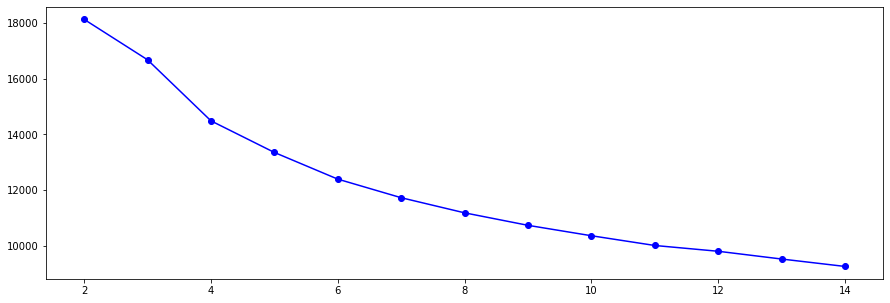

In [55]:
#creating a dataframe for no. of clusters and cluster errors
cluster_df = pd.DataFrame({'num_clusters': cluster_range, 'cluster_errors': cluster_errors})

#Elbow plot
plt.figure(figsize=[15, 5])
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o', color='b')
plt.show()

In [66]:
#Applying KMeans clustering for the optimal no. of clusters obtained above.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=100).fit(pca_df)

In [86]:
#creating a dataframe of the labels
label = pd.DataFrame(kmeans.labels_, columns=['Label'])

In [100]:
df['label'] = label
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,label
0,2,0,58138.0,58,7,0,1617,25,0,1,65,1
1,2,0,46344.0,38,5,0,27,6,2,0,68,0
2,2,1,71613.0,26,4,0,776,21,0,0,57,2
3,2,1,26646.0,26,6,0,53,8,1,0,38,0
4,4,1,58293.0,94,5,0,422,19,1,0,41,2


In [72]:
df['label'].unique()

array([1, 0, 2])

In [74]:
df['label'].value_counts(normalize=True)*100

0    45.669643
2    31.696429
1    22.633929
Name: label, dtype: float64

In [75]:
df[df['label'] == 1]['Income'].mean()

78857.16174638101

In [77]:
df[df['label'] == 2]['Income'].mean()

59419.82325850409

In [78]:
df[df['label'] == 0]['Income'].mean()

34081.317217534604

In [80]:
df[df['Marital_Status'] == 0]['Marital_Status'].value_counts()

0    796
Name: Marital_Status, dtype: int64

In [81]:
df[df['Marital_Status'] == 1]['Marital_Status'].value_counts()

1    1444
Name: Marital_Status, dtype: int64

#Insight
1. Cluster1 have more avgerage of income than Cluster2 and Cluster3 has least average of income.
2. Those no. of customers whose marital status is relationship is greater than single.

In [88]:
#joining the label column in the dataset
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,-1.576873,1
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,0.972746,0
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,-0.735851,2
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,0.005032,0
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,-0.016878,2


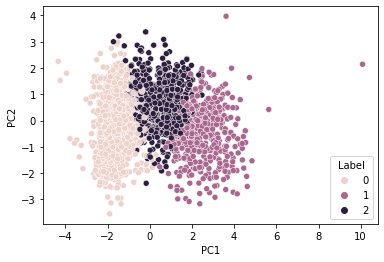

In [90]:
#visualising the clusters
sns.scatterplot(kmeans_df['PC1'], kmeans_df['PC2'], hue='Label', data=kmeans_df)
plt.show()

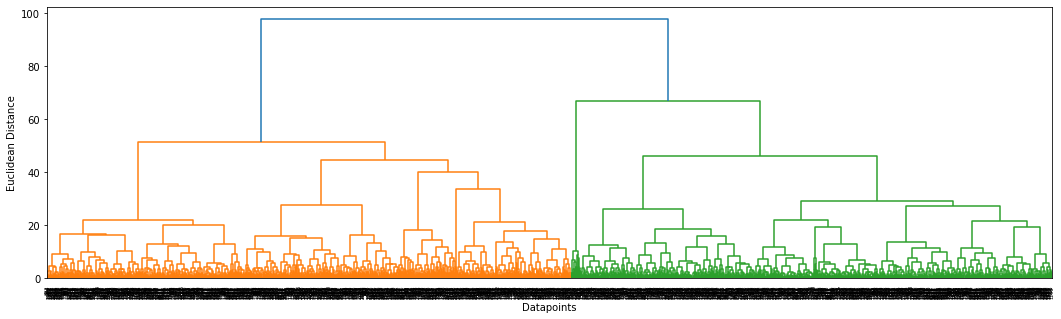

In [91]:
plt.figure(figsize=[18, 5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean Distance')
plt.show()

In [92]:
from sklearn.metrics import silhouette_score

In [93]:
for i in range(2, 15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i, silhouette_score(scaled_features_df, labels))

2 0.19083932398841263
3 0.19859065923121116
4 0.11245037433445754
5 0.1142462175685332
6 0.13181821517770267
7 0.13957002140192074
8 0.1390706310270007
9 0.11337088108590954
10 0.11192131225156017
11 0.10382081162153395
12 0.10893099764800893
13 0.1023394958833542
14 0.09549869159604249


1. We can observe from dendrogram and silhouette score the highest no. of cluster is 3.
2. Let choose k=3 as the optimal cluster size and build an agglomerative clustering model using the original scaled dataset.

In [94]:
#Building the hierarchical clustering model using the optimal cluster as 3 using original data.
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [95]:
#Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label1.head()

,Labels
0,0
1,1
2,0
3,1
4,0


In [101]:
#joining the label dataframe with unscaled initial cleaned dataframe(dfc).
df_hier = df.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,label,Labels
0,2,0,58138.0,58,7,0,1617,25,0,1,65,1,0
1,2,0,46344.0,38,5,0,27,6,2,0,68,0,1
2,2,1,71613.0,26,4,0,776,21,0,0,57,2,0
3,2,1,26646.0,26,6,0,53,8,1,0,38,0,1
4,4,1,58293.0,94,5,0,422,19,1,0,41,2,0


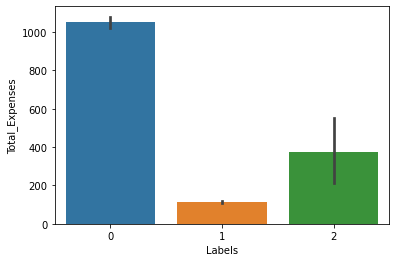

In [103]:
sns.barplot(df_hier['Labels'], df_hier['Total_Expenses'])
plt.show()

The total expenses is much higher for cluster0.

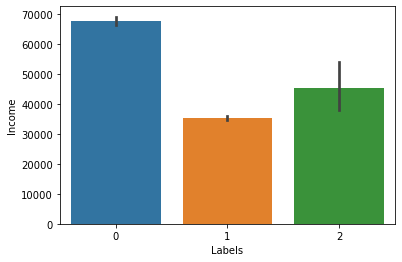

In [104]:
sns.barplot(df_hier['Labels'], df_hier['Income'])
plt.show()

The Income is much higher for cluster0.

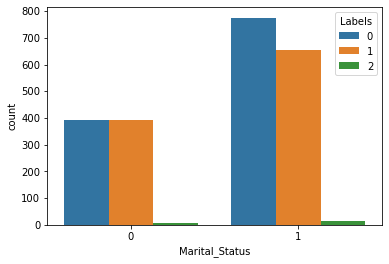

In [105]:
sns.countplot(df_hier['Marital_Status'], hue='Labels', data=df_hier)
plt.show()

Most customer that falls in Cluster0 is from relationship marital status.

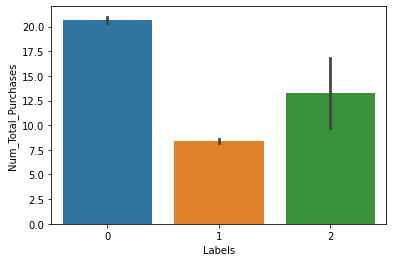

In [106]:
sns.barplot(df_hier['Labels'], df_hier['Num_Total_Purchases'])
plt.show()

Total purchases is higher for customers of Cluster0.

In [ ]:
#Insight
1. We can conclude that the customers from Cluster0 has max. income, spent max. and maximum purchases.
2. Where cluster1 has the least purchases, expenses and income.
3. Cluster2 does average purchase and having average income.